In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

In [3]:
compound_db = pd.read_csv('../BDEModel/Datasets/20220511_unique_compound_copy_with_dirads_glob.csv.gz')
compound_db

,Unnamed: 0,id,smiles,type,run,status,enthalpy,mol,run_at,queued_at,logfile,error,node,freeenergy,scfenergy,stereo_assigned,stereo_unassigned,cartesian,conj_path_length
0,0,524894.0,[Br],fragment,20,finished,-2574.147944,524894\n RDKit 3D\n\n 1 0 0 0...,2019-12-17 12:23:50.103537,2019-12-17 12:23:31.022738,/projects/cooptimasoot/psj_bde/log/524894_51f2...,NaN,NaN,-2574.167134,-2574.148890,NaN,NaN,0.000000,0
1,1,946987.0,BrC12C3C4[C]5C3C1C5C42,fragment,20,finished,-2882.248712,946987\n RDKit 3D\n\n 15 19 0 0...,2019-12-31 22:08:29.010958,2019-12-31 21:54:49.710824,/projects/cooptimasoot/psj_bde/log/946987_4b48...,NaN,r3i0n12,-2882.287792,-2882.366110,NaN,NaN,0.000000,0
2,2,528948.0,BrC12C[C](C1)C2,fragment,20,finished,-2768.071609,528948\n RDKit 3D\n\n 12 13 0 0...,2019-12-17 16:00:51.738439,2019-12-17 15:54:40.831218,/projects/cooptimasoot/psj_bde/log/528948_fe9e...,[Errno 5] Input/output error: '/tmp/scratch/tm...,r4i5n2,-2768.109210,-2768.171475,NaN,NaN,0.000000,0
3,3,528946.0,BrC12CC(C1)C2,molecule,20,finished,-2768.730263,528946\n RDKit 3D\n\n 13 14 0 0...,2019-12-17 10:14:28.941515,2019-12-17 10:11:12.342110,/projects/cooptimasoot/psj_bde/log/528946_1ac9...,NaN,NaN,-2768.766376,-2768.843121,NaN,NaN,0.000000,0
4,4,678256.0,BrC12CCC(CC1)CC2,molecule,20,finished,-2886.645601,678256\n RDKit 3D\n\n 22 23 0 0...,2019-12-23 00:11:56.825598,2019-12-22 23:40:57.622607,/projects/cooptimasoot/psj_bde/log/678256_0ee7...,NaN,r6i1n21,-2886.688112,-2886.851037,NaN,NaN,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601612,601612,978156.0,[SiH3]N([SiH3])c1cc[c]cc1,fragment,30,finished,-868.145372,978156\n RDKit 3D\n\n 19 19 0 0...,2021-06-24 13:13:08.136190,2021-06-24 12:48:13.616891,/projects/scanndt/pstjohn/log/978156_74fe38.lo...,NaN,r7i6n34,-868.192696,-868.292710,NaN,NaN,0.000000,0
601613,601613,978158.0,[SiH3]N([SiH3])c1[c]cc(N([SiH3])[SiH3])cc1,fragment,30,finished,-1504.849594,978158\n RDKit 3D\n\n 27 27 0 0...,2021-06-24 14:25:33.096992,2021-06-24 12:49:34.555245,/projects/scanndt/pstjohn/log/978158_b6b705.lo...,NaN,r7i0n10,-1504.911512,-1505.050941,NaN,NaN,0.000000,0
601614,601614,978152.0,[SiH3]N([SiH3])c1ccc(N([SiH3])[SiH3])cc1,molecule,30,finished,-1505.519706,978152\n RDKit 3D\n\n 28 28 0 0...,2021-06-24 13:26:05.246125,2021-06-24 12:44:03.738157,/projects/scanndt/pstjohn/log/978152_746cac.lo...,NaN,r103u29,-1505.580854,-1505.733975,NaN,NaN,0.000000,0
601615,601615,569881.0,[S]N1CCCCC1,fragment,20,finished,-649.280422,569881\n RDKit 3D\n\n 17 17 0 0...,2019-12-19 04:18:36.944279,2019-12-19 03:58:49.542543,/projects/cooptimasoot/psj_bde/log/569881_d4ad...,NaN,r4i5n34,-649.320159,-649.438187,NaN,NaN,0.000000,0


In [8]:
ring_smiles = pd.read_csv('./RingSmiles.csv')
ring_smiles = ring_smiles['0']
ring_smiles = ring_smiles.drop_duplicates()
ring_smiles

0      Cc1ccc2c(c1)cc(C(=O)N1CC[C@H](C(=O)N3CCCCC3)C1...
1                    O[C@@H]1C=C[C@H](O)[C@H](O)[C@@H]1O
2                                    C1CC1N[C@@H]1CCCSC1
3                                  CC1(C)CC[C@H](C#N)N1O
4                                      O=C1CCC[C@H](O)N1
                             ...                        
995                                         Cc1csc(CO)c1
996                                     Nc1nccn[n+]1[O-]
997                                   C[C@H]1SC(=N)NC1=O
998                                         CCn1cccc1C#N
999                          O=C1N[C@H](C(=O)O)C[C@@H]1O
Name: 0, Length: 985, dtype: object

In [17]:
#ring_energy = []
#for smiles in tqdm(ring_smiles):
 #   my_row = compound_db[compound_db['smiles']]
  #  print(f'Free Energy for [ring_energy]:yvalue = [freeenergy:.4f], SMILES String = [ring_smiles:.4f]')

  0%|                                                   | 0/985 [00:00<?, ?it/s]


KeyError: 'Cc1ccc2c(c1)cc(C(=O)N1CC[C@H](C(=O)N3CCCCC3)C1)n2C'

In [59]:
my_row = compound_db[compound_db['smiles'].isin(ring_smiles)]
my_row.to_csv('./BDEDbSampled.csv')

In [26]:
bde_db = my_row[['smiles', 'freeenergy']]
bde_db

,smiles,freeenergy
316,Brc1ccc2c(c1)COC2,-2958.355380
677,Brc1cccc2nnnn21,-2985.413937
1002,Brc1ccnn1C1CC1,-2916.385070
1069,Brc1cn2ncnc2cn1,-2985.451822
1283,Brc1cncc(C2CC2)c1,-2938.450629
...,...,...
600148,S=c1[nH]cc2cnccn21,-793.988811
600330,S=c1sc2ccccc2s1,-1463.651501
600336,S=c1sc2cccnc2s1,-1479.704289
600987,SCCNC1CCNCC1,-783.825185


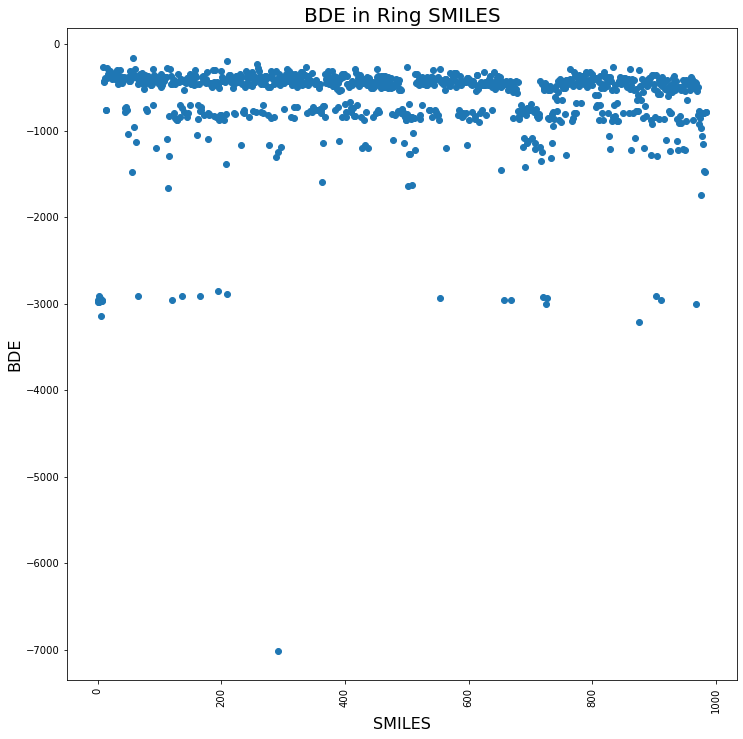

In [58]:
fig=plt.figure(figsize = (12, 12))
ax = fig.add_subplot()
ax.set_title('BDE in Ring SMILES', fontsize=20)
ax.set_xlabel('SMILES', fontsize=16)
ax.set_ylabel('BDE', fontsize=16)
ax = plt.scatter(x = range(len(bde_db['freeenergy'])), y = bde_db['freeenergy'])
plt.xticks(rotation=90)
#fig ,axs = plt.subplots(4, 4, constrained_layout = True)
plt.savefig('./SmileBDE.png', bbox_inches='tight')
plt.savefig('./SmileBDE.pdf', bbox_inches='tight')